In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import pandas as pd
import matplotlib.pyplot as plt
import os

'/Users/sainikhil/Downloads/Machine Learning/Project 2'

In [5]:
# Load Feature matrix
Feature_matrix1D_comp = np.load("Extracted data/Feature_matrix1D.npz")
Feature_matrix_window_comp = np.load("Extracted data/Feature_matrix_window.npz")

Feature_matrix1D = Feature_matrix1D_comp.f.arr_0
Feature_matrix_window = Feature_matrix_window_comp.f.arr_0

# Rectify shape
print("Shape without window avergaing: {}".format(Feature_matrix1D.shape))
print("Shape with window avergaing: {}".format(Feature_matrix_window.shape))

Shape without window avergaing: (8560, 89)
Shape with window avergaing: (8560, 89)


In [6]:
# Separate data and labels

label_1D = Feature_matrix1D[:,0]
Features1D = Feature_matrix1D[:,1:]

print("Shape label : {} ; Feature: {}".format(label_1D.shape, Features1D.shape))

label_window = Feature_matrix_window[:, 0]
Features_window = Feature_matrix_window[:, 1:]

print("Shape label : {} ; Feature: {}".format(label_window.shape, Features_window.shape))


Shape label : (8560,) ; Feature: (8560, 88)
Shape label : (8560,) ; Feature: (8560, 88)


In [20]:
#Select only mean features and skip variance features
Features1D = Features1D[:,0::2]
Features_window = Features_window[:,0::2]

In [21]:
Features1D.shape

(8560, 44)

In [45]:
Features1D.shape

(8560, 44)

In [44]:
fs.scores_

array([0.01335778, 0.01489122, 0.        , 0.02475389, 0.01189234,
       0.02807139, 0.0027321 , 0.01624795, 0.00844201, 0.02054874,
       0.0147457 , 0.00650107, 0.01288063, 0.01172027, 0.        ,
       0.        , 0.00540328, 0.01466874, 0.00278829, 0.        ,
       0.01006486, 0.02057868, 0.00957273, 0.00586742, 0.00263644,
       0.00238285, 0.00013538, 0.00178541, 0.00072389, 0.00161852,
       0.01469227, 0.00732928, 0.01232477, 0.00834602, 0.00084038,
       0.00887798, 0.01167157, 0.0035886 , 0.0112705 , 0.00391215,
       0.0129313 , 0.01552117, 0.03418097, 0.0458594 ])

In [22]:
# Scale both feature sets

scaler_window = StandardScaler()
scaler1D = StandardScaler()

Features1D_Scaled = scaler1D.fit_transform(Features1D)
Features_window_Scaled = scaler_window.fit_transform(Features_window)

In [23]:
# Separate into test and train 
X_train1D , X_test1D, y_train1D, y_test1D = train_test_split(
    Features1D, label_1D, test_size=0.5,stratify=None, shuffle= False)

X_train_window, X_test_window, y_train_window, y_test_window = train_test_split(
    Features_window, label_window, test_size=0.5, stratify=None, shuffle=False)

# Check class distribution
print("Unique window: {}".format(np.unique(y_train_window, return_counts=True)))
print("Unique 1D: {}".format(np.unique(y_train1D, return_counts=True)))

Unique window: (array([1.]), array([4280]))
Unique 1D: (array([1.]), array([4280]))


In [25]:
#NOTE: Class - 1: Prog_Rock

fs = SelectKBest(score_func=mutual_info_classif, k='all')

fs.fit(Features_window, label_window)
importance = []
count = 1
for score in fs.scores_:
    print("Features {} : {:.4f}".format(count, score))
    importance.append(score)
    count += 1

Features 1 : 0.0134
Features 2 : 0.0149
Features 3 : 0.0000
Features 4 : 0.0248
Features 5 : 0.0119
Features 6 : 0.0281
Features 7 : 0.0027
Features 8 : 0.0162
Features 9 : 0.0084
Features 10 : 0.0205
Features 11 : 0.0147
Features 12 : 0.0065
Features 13 : 0.0129
Features 14 : 0.0117
Features 15 : 0.0000
Features 16 : 0.0000
Features 17 : 0.0054
Features 18 : 0.0147
Features 19 : 0.0028
Features 20 : 0.0000
Features 21 : 0.0101
Features 22 : 0.0206
Features 23 : 0.0096
Features 24 : 0.0059
Features 25 : 0.0026
Features 26 : 0.0024
Features 27 : 0.0001
Features 28 : 0.0018
Features 29 : 0.0007
Features 30 : 0.0016
Features 31 : 0.0147
Features 32 : 0.0073
Features 33 : 0.0123
Features 34 : 0.0083
Features 35 : 0.0008
Features 36 : 0.0089
Features 37 : 0.0117
Features 38 : 0.0036
Features 39 : 0.0113
Features 40 : 0.0039
Features 41 : 0.0129
Features 42 : 0.0155
Features 43 : 0.0342
Features 44 : 0.0459


In [36]:
fs.scores_

array([0.01335778, 0.01489122, 0.        , 0.02475389, 0.01189234,
       0.02807139, 0.0027321 , 0.01624795, 0.00844201, 0.02054874,
       0.0147457 , 0.00650107, 0.01288063, 0.01172027, 0.        ,
       0.        , 0.00540328, 0.01466874, 0.00278829, 0.        ,
       0.01006486, 0.02057868, 0.00957273, 0.00586742, 0.00263644,
       0.00238285, 0.00013538, 0.00178541, 0.00072389, 0.00161852,
       0.01469227, 0.00732928, 0.01232477, 0.00834602, 0.00084038,
       0.00887798, 0.01167157, 0.0035886 , 0.0112705 , 0.00391215,
       0.0129313 , 0.01552117, 0.03418097, 0.0458594 ])

In [31]:
features = []
def feature_name_generator(feature_name,count):
    for i in range(count):
        features.append(feature_name+"_{}".format(i))

In [32]:
feature_name_generator("Contrast",7)
feature_name_generator("Chroma",12)
feature_name_generator("mfcc",20)
features.append("Spectral centroid")
features.append("Zero crossing")
features.append("Spectral rolloff")
features.append("RMS")
features.append("Beat")

In [33]:
features

['Contrast_0',
 'Contrast_1',
 'Contrast_2',
 'Contrast_3',
 'Contrast_4',
 'Contrast_5',
 'Contrast_6',
 'Chroma_0',
 'Chroma_1',
 'Chroma_2',
 'Chroma_3',
 'Chroma_4',
 'Chroma_5',
 'Chroma_6',
 'Chroma_7',
 'Chroma_8',
 'Chroma_9',
 'Chroma_10',
 'Chroma_11',
 'mfcc_0',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'Spectral centroid',
 'Zero crossing',
 'Spectral rolloff',
 'RMS',
 'Beat']

[Text(0, 0, 'Contrast_0'),
 Text(1, 0, 'Contrast_1'),
 Text(2, 0, 'Contrast_2'),
 Text(3, 0, 'Contrast_3'),
 Text(4, 0, 'Contrast_4'),
 Text(5, 0, 'Contrast_5'),
 Text(6, 0, 'Contrast_6'),
 Text(7, 0, 'Chroma_0'),
 Text(8, 0, 'Chroma_1'),
 Text(9, 0, 'Chroma_2'),
 Text(10, 0, 'Chroma_3'),
 Text(11, 0, 'Chroma_4'),
 Text(12, 0, 'Chroma_5'),
 Text(13, 0, 'Chroma_6'),
 Text(14, 0, 'Chroma_7'),
 Text(15, 0, 'Chroma_8'),
 Text(16, 0, 'Chroma_9'),
 Text(17, 0, 'Chroma_10'),
 Text(18, 0, 'Chroma_11'),
 Text(19, 0, 'mfcc_0'),
 Text(20, 0, 'mfcc_1'),
 Text(21, 0, 'mfcc_2'),
 Text(22, 0, 'mfcc_3'),
 Text(23, 0, 'mfcc_4'),
 Text(24, 0, 'mfcc_5'),
 Text(25, 0, 'mfcc_6'),
 Text(26, 0, 'mfcc_7'),
 Text(27, 0, 'mfcc_8'),
 Text(28, 0, 'mfcc_9'),
 Text(29, 0, 'mfcc_10'),
 Text(30, 0, 'mfcc_11'),
 Text(31, 0, 'mfcc_12'),
 Text(32, 0, 'mfcc_13'),
 Text(33, 0, 'mfcc_14'),
 Text(34, 0, 'mfcc_15'),
 Text(35, 0, 'mfcc_16'),
 Text(36, 0, 'mfcc_17'),
 Text(37, 0, 'mfcc_18'),
 Text(38, 0, 'mfcc_19'),
 Text(39, 

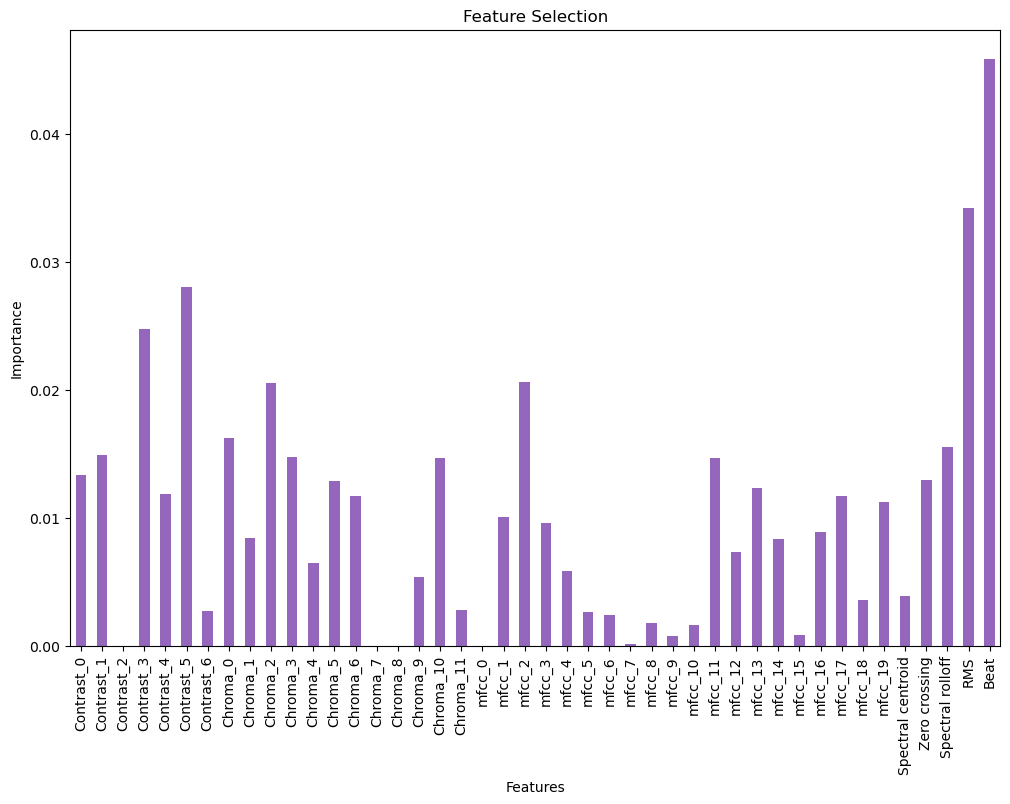

In [42]:

#pd.set_option('display.mpl_style', 'default') 
%matplotlib inline



importance_series = pd.Series(fs.scores_)

x_labels = features

# Plot the figure.
plt.figure(figsize=(12, 8))
fig = importance_series.plot(kind='bar',color='tab:purple')
fig.set_title('Feature Selection')
fig.set_xlabel('Features')
fig.set_ylabel('Importance')
fig.set_xticklabels(x_labels)

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [11]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=300))
sel.fit(Features1D_Scaled, label_1D)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=300))

In [12]:
sel.get_support()

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True])

In [13]:
selected_feat = pd.DataFrame(Features1D_Scaled).columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)


26
Int64Index([ 5,  6,  7,  8,  9, 10, 13, 14, 16, 18, 20, 24, 26, 28, 30, 35, 37,
            43, 57, 74, 80, 82, 84, 85, 86, 87],
           dtype='int64')


<AxesSubplot:>

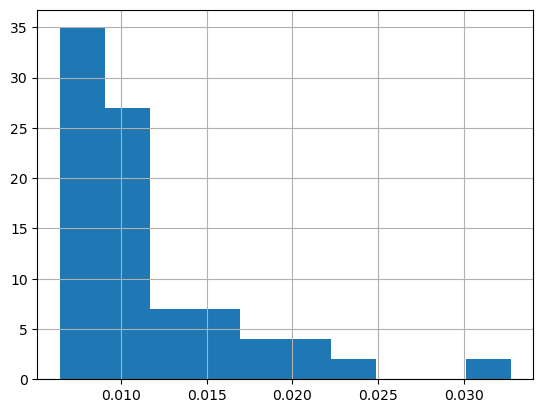

In [14]:
pd.Series(sel.estimator_.feature_importances_.ravel(),
          index=pd.DataFrame(Features1D_Scaled).columns).hist()


<AxesSubplot:>

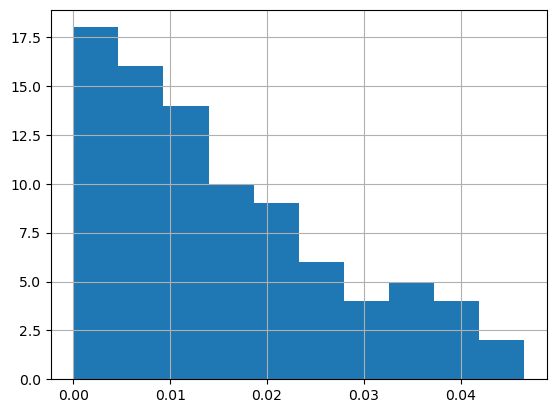

In [15]:
pd.Series(fs.scores_.ravel(),
          index=pd.DataFrame(Features1D_Scaled).columns).hist()
